# Final Project

## FASTA File Reader

In [25]:
# CHANGE "results.fasta" TO WHATEVER YOU CALLED THE FASTA FILE
infile = open("results.fasta")
for line in infile:
    print(line)

## Dictionary for Amino Acids/Species

In [2]:
# Hydrophobicity scale (Kyte-Doolittle)
aa_scale = {"A":1.8, "C": 2.5, "D":-3.5, "E":-3.5, "F":2.8, "G":-0.4, "H":-3.2, "I":4.5, "K":-3.9, "L":3.8, "M":1.9,
            "N":-3.5, "P":-1.6, "Q":-3.5, "R":-4.5, "S":-0.8, "T":-0.7, "V":4.2, "W":-0.9, "Y":-1.3, "-":0.0}

In [3]:
# Species Index
species_name0 = "Ambystoma mexicanum"
species_name1 = "Cynops orientalis"
species_name2 = "Elephantulus edwardii"
species_name3 = "Manis pentadactyla"
species_name4 = "Marmota marmota marmota"
species_name5 = "Myotis myotis"
species_name6 = "Oryx dammah"
species_name7 = "Panthera tigris"
species_name8 = "Saccharomyces cerevisiae"

species = ["Saccharomyces cerevisiae", "Myotis myotis", "Elephantulus edwardii", "Oryx dammah", 
           "Marmota marmota marmota", "Panthera tigris", "Manis pentadactyla", "Ambystoma mexicanum", "Cynops orientalis"]

## FASTA Parser

In [5]:
def parse_fasta_file(input_file):
    """Returns a dict of {id:gene_seq} pairs based on the sequences in the input FASTA file
    input_file -- a file handle for an input FASTA file
    """
    
    genes = {}
    curr_seq_id = None
    curr_seq = []

    for line in f:
        line = line.strip()

        if line.startswith(">"):
            if curr_seq_id is not None:
                genes[curr_seq_id] = ''.join(curr_seq)

            curr_seq_id = line[line.find("[") + 1:line.find("]")]
            curr_seq = []
            continue
        curr_seq.append(line)

    genes[curr_seq_id] = ''.join(curr_seq)
    return genes

In [6]:
# Converts our .fasta file into a dictionary of {id:protein_seq}
input_file = "results.fasta"
f = open(input_file)

seq = parse_fasta_file(input_file)

## aa to Hydrophobicity Numbers

In [7]:
def aa_to_Hydrophobicity(seq):
    """Returns hydrophobicity values based on the nucleotides in the input seq
    seq -- input nucleotides to be converted
    """
    
    data = []
    a = ""
    for x in range(len(seq)):
        a = seq[x]
        data.append(aa_scale.get(a))
    return data

## Get Average Hydrophobicity

In [8]:
def get_avg(lst):
    """Returns average from list
    lst -- input list to be averaged
    """
    return sum(lst) / len(lst) 

## Populates Average Score for all Species

In [9]:
avg_hydrophobicity = []
a = ""

for x in range(len(seq)): 
    avg_hydrophobicity.append(get_avg(aa_to_Hydrophobicity(seq[species[x]])))

## Creates a DataFrame for Graph 3

In [10]:
import pandas as pd

data = {"Species":species}

# Generates df in ascending order of mean hydrophobicity
df = pd.DataFrame(avg_hydrophobicity, species).sort_values(by=[0], ascending=True)
df = df.sort_values(by=[0], ascending=True)

## Get Average Hydrophobicity for Species Excluding Axolotl

In [11]:
import numpy as np

# Makes array of catalase sequences to average out
data = np.array([aa_to_Hydrophobicity(seq[species_name1]), aa_to_Hydrophobicity(seq[species_name2]),
                aa_to_Hydrophobicity(seq[species_name3]), aa_to_Hydrophobicity(seq[species_name4]),
                aa_to_Hydrophobicity(seq[species_name5]), aa_to_Hydrophobicity(seq[species_name6]),
                aa_to_Hydrophobicity(seq[species_name7]), aa_to_Hydrophobicity(seq[species_name8])])

# Averages sequences
mean = np.average(data, axis=0)
mean = mean.tolist()

## Graphs

### Graph 1: Hydrophobicity Chart Comparing Axolotl to Mean of other Species

(1.0, 541.0, -5.0, 5.0)

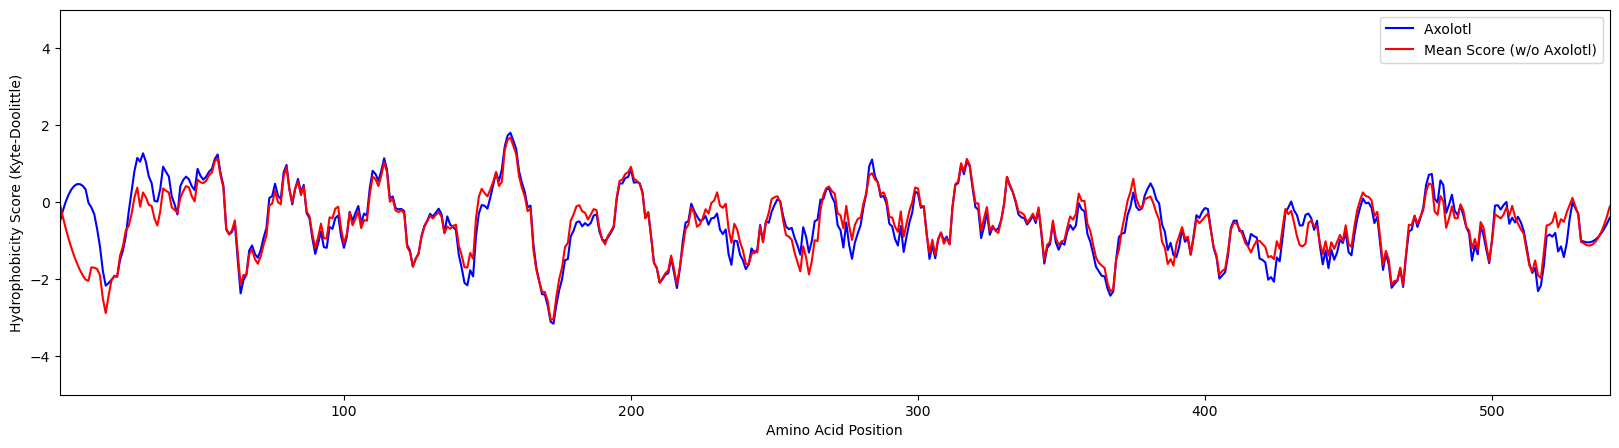

In [30]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Assigns data
y_data1 = aa_to_Hydrophobicity(seq[species_name0])
y_data2 = mean

# Applies digital filter to data
clean_y_data1 = savgol_filter(y_data1, 20, 2)
clean_y_data2 = savgol_filter(y_data2, 20, 2)

# Adjusts graph size
plt.figure(figsize=(20, 5))

# Adjusts x-axis range
x_data = range(1, len(y_data1)+1)

# Assigns colors
plt.plot(x_data, clean_y_data1, color='blue')
plt.plot(x_data, clean_y_data2, color='red')

# Writes axes labels
plt.xlabel("Amino Acid Position")
plt.ylabel("Hydrophobicity Score (Kyte-Doolittle)")
plt.legend(["Axolotl ", "Mean Score (w/o Axolotl)"]) 

# Adjusts axes scale 
plt.axis([1, len(y_data1), -5, 5])

### Graph 2: Bar Chart Comparing Differences in Hydrophobicity

(1.0, 541.0, 0.0, 2.5)

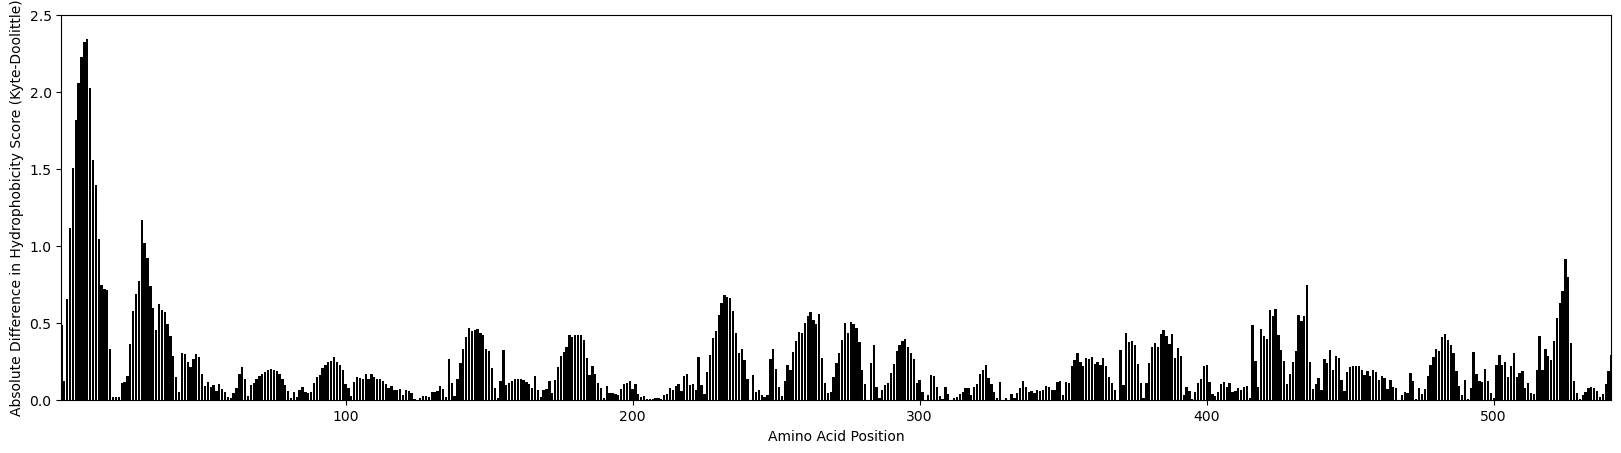

In [35]:
# Assigns data
y_data1 = aa_to_Hydrophobicity(seq[species_name0])
y_data2 = mean

# Applies digital filter to data
clean_y_data1 = savgol_filter(y_data1, 20, 2)
clean_y_data2 = savgol_filter(y_data2, 20, 2)

# Calculates difference between y_data1 and y_data2 after filter
difference = np.abs(clean_y_data1 - clean_y_data2)

# Adjusts graph size
plt.figure(figsize=(20, 5))

x_data = np.arange(1, len(difference) + 1)

# Assigns color
plt.bar(x_data, difference, color='black')

# Writes axes labels
plt.xlabel("Amino Acid Position")
plt.ylabel("Absolute Difference in Hydrophobicity Score (Kyte-Doolittle)")

# Adjusts axes scale
plt.axis([1, len(y_data1), 0, 2.5])

### Graph 3: Hydrophobicity Bar Chart Showing no Significant Difference

(-0.5, 8.5, -0.63, -0.565)

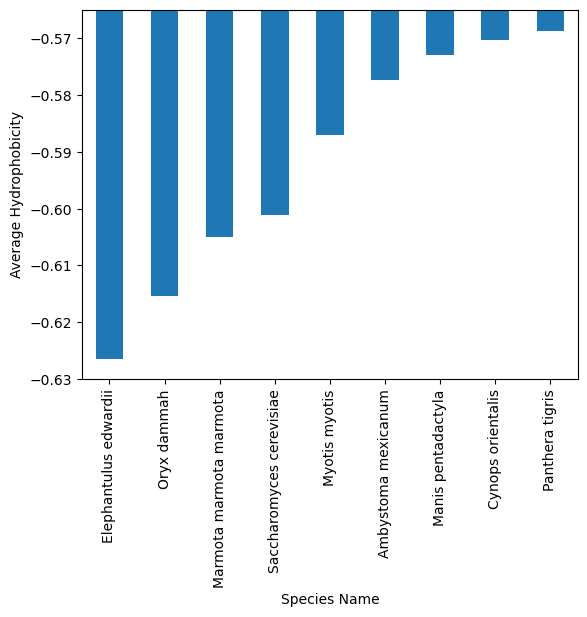

In [25]:
# Creates bar graph
ax = df.plot.bar()

# Creates labels for axes
ax.set_xlabel("Species Name")
ax.set_ylabel("Average Hydrophobicity")

# Removes annoying legend
ax.get_legend().remove()

# Sets scale for y-axis
ax.axis([-0.5, 8.5, -0.63, -0.565])